# Step 1. Introduction

In [58]:
#importing library
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np

In [59]:
#loading dataset
games_pd = pd.read_csv('../games.csv')

games_pd.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Step 2. Prepare the data

- Replace the column names (make them lowercase).
- Convert the data to the required types.
- Describe the columns where the data types have been changed and why.
- If necessary, decide how to deal with missing values:
    - Explain why you filled in the missing values as you did or why you decided to leave them blank.
    - Why do you think the values are missing? Give possible reasons.
    - Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [4]:
#changing column names to lowercase
games_pd.columns = games_pd.columns.str.lower()
games_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games_pd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Data type of 'year_of_release' will change to 'integer' type. But first, we will fix the missing values first.

There are missing values in the column of 'name', 'year_of_release','critic_score', 'user_score' and 'rating'. 

## 'name' Column

In [6]:
#changing to the lowercase to "name" column
games_pd['name'] = games_pd['name'].str.lower()
games_pd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
#check for unique value in "name" column
games_pd['name'].unique()

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

## 'platform' Column

In [8]:
#change to the lowercase to "platform" column
games_pd['platform'] = games_pd['platform'].str.lower()
games_pd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 'year_of_release' Column
Now, we are going to fix the missing value of 'year_of_release' with the median value for each. Then, we will change the data type from float to integer.

In [9]:
median_value = games_pd.groupby('platform')['year_of_release'].median().to_dict()

def missing_value(row):
    if np.isnan(row['year_of_release']):
        return median_value.get(row['platform'])
    return row['year_of_release']

games_pd['year_of_release'] = games_pd.apply(missing_value, axis=1)
games_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
#converting dtypes to column "year_of_release"
games_pd['year_of_release'] = games_pd['year_of_release'].astype('int')
games_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


## "genre" Column
For column "genre", it only has two missing values. We're gonna dropna it.

In [11]:
games_pd['genre'] = games_pd['genre'].dropna()
games_pd['genre'] = games_pd['genre'].str.lower()
games_pd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 'user_score' Column

In [12]:
#checking value count
games_pd['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

It is found that this column value has 'tbd' value. We will replave 'tbd' with 'NaN' and fill it with mean. Then, dtypes will change to float. 

Missing values in 'name' and 'critic_score' can be ignored becasue the median based on genre or platform is not accurate. It usually depend on the game itself.

In [14]:
games_pd['user_score'] = games_pd['user_score'].replace({'tbd' : np.nan})
games_pd['user_score'] = games_pd['user_score'].astype('float')
games_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## 'rating' Column'

Before fixing this column, we are gonna check the unique values.

In [15]:
#checking unique values
games_pd['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Since this is the categorical column, we cannot fill with mean or median. Therefore, we are gonna fill in with 'unknown'.

In [16]:
# Filling missing values
games_pd['rating'] = games_pd['rating'].fillna('unknown')
games_pd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


## Possible reasons why there are missing values:

- Human errors when they are handling data
- problems during data collection such as equipmemt malfuntion
- When merging multiple data sources, mismatches or inconsistencies between these sources can result in missing values.

## Calculating Total Sales

In [17]:
games_pd['total_sales'] = games_pd['na_sales'] + games_pd['eu_sales'] + games_pd['jp_sales'] + games_pd['other_sales']
games_pd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


# Step 3. Analyze the data

- Look at how many games were released in different years. Is the data for every period significant?
- Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a model for 2017.
- Work only with the data that you've decided is relevant. Disregard the data for previous years.
- Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
- Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
- Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- Keeping your conclusions in mind, compare the sales of the same games on other platforms.
- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?


## Numbers of games released

In [18]:
games_release = games_pd.groupby('year_of_release')['name'].count()
display(games_release)

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     290
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1476
2010    1302
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: name, dtype: int64

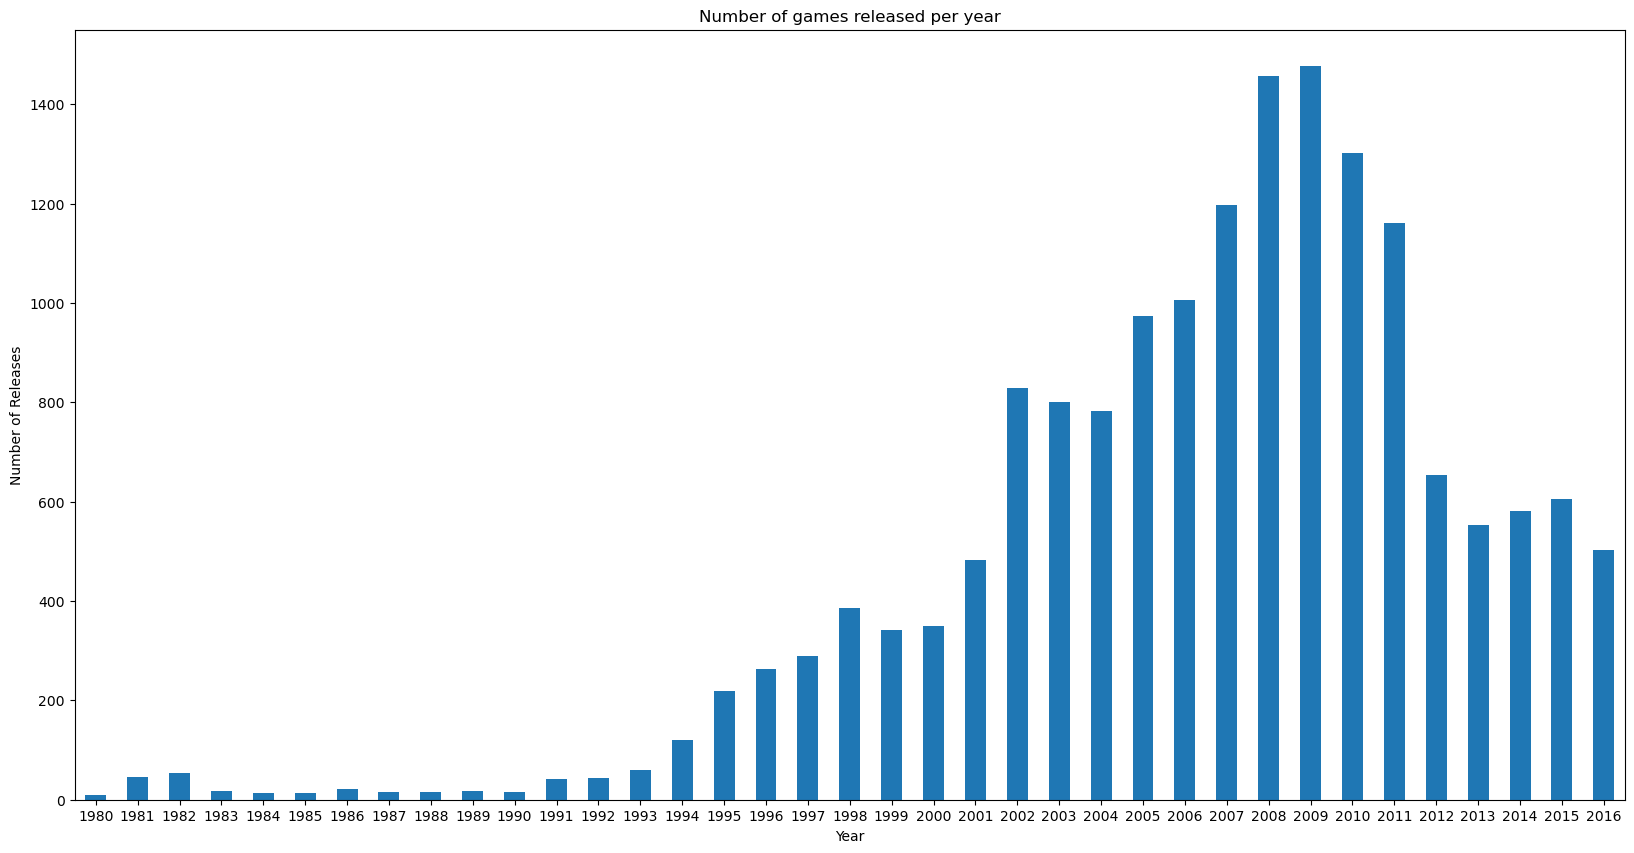

In [19]:
#let's make a bar plot
games_release.plot.bar(rot = 0, figsize= (20,10))
plt.title('Number of games released per year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()

Based on the chart, only little games were released between 1980 and 1994. And started getting popular after 1995. The highest rate is at 2009 and after that, it started to get lower again.

## Length of Platforms

In [20]:
sorted_platform = games_pd.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
sorted_platform.head()

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
Name: total_sales, dtype: float64

In [21]:
# using query to filter data
ps2 = games_pd.query('platform == "ps2"')
x360 = games_pd.query('platform == "x360"')
ps3 = games_pd.query('platform == "ps3"')
wii = games_pd.query('platform == "wii"')
ds = games_pd.query('platform == "ds"')

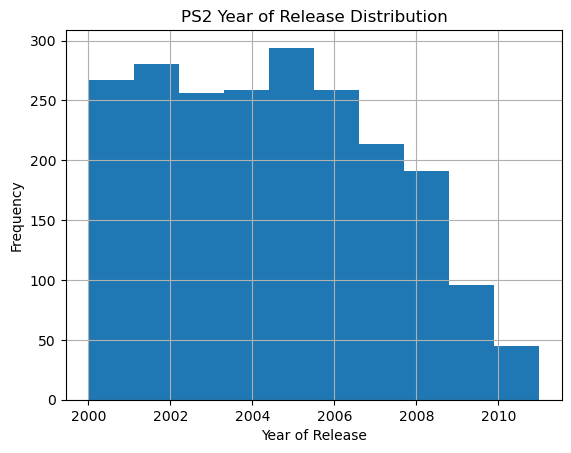

In [22]:
#Let's make histogram
# Histogram for PS2
ps2.hist('year_of_release')
plt.title('PS2 Year of Release Distribution')
plt.xlabel('Year of Release')
plt.ylabel('Frequency')
plt.show()

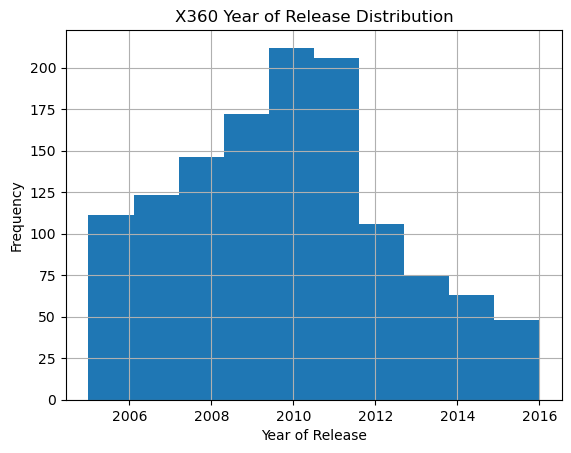

In [23]:
# Histogram for X360
x360.hist('year_of_release')
plt.title('X360 Year of Release Distribution')
plt.xlabel('Year of Release')
plt.ylabel('Frequency')
plt.show()

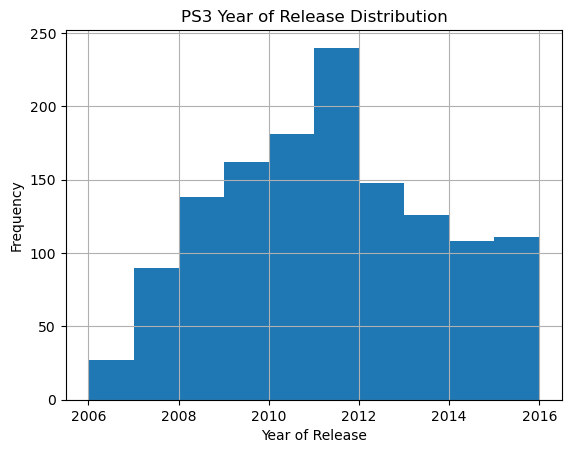

In [24]:
# Histogram for PS3
ps3.hist('year_of_release')
plt.title('PS3 Year of Release Distribution')
plt.xlabel('Year of Release')
plt.ylabel('Frequency')
plt.show()

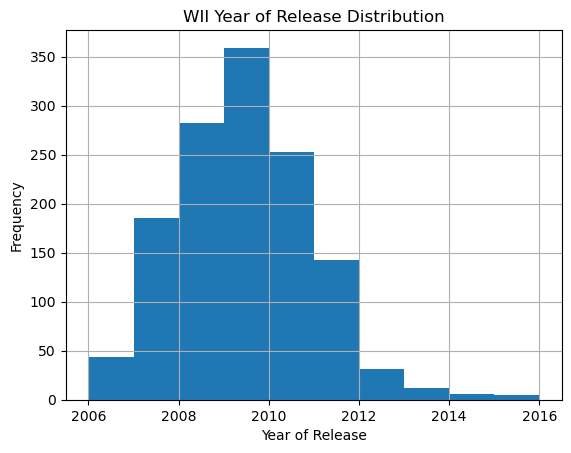

In [25]:
#Histogram for wii
wii.hist('year_of_release')
plt.title('WII Year of Release Distribution')
plt.xlabel('Year of Release')
plt.ylabel('Frequency')
plt.show()

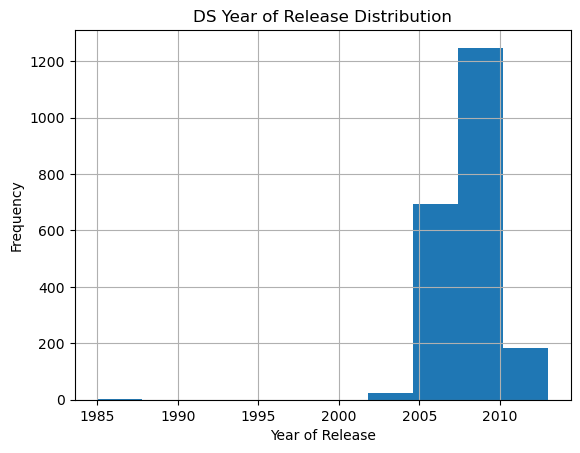

In [26]:
#Histogram for ds
ds.hist('year_of_release')
plt.title('DS Year of Release Distribution')
plt.xlabel('Year of Release')
plt.ylabel('Frequency')
plt.show()

Based on the findings, ps2,wii,ps3 platforms have an average sales life of 10 years. ps2 sales were very consistent from 2000 to 2006 until wii and ps3 sales are getting popular.

Next step of the project is to forecast the sales of profit of 2017. But first we will need to analyze the sales pattern from 2012 to obtain relevat data.

In [27]:
recent_release = (games_pd[(~games_pd['year_of_release'].isnull()) & (games_pd['year_of_release'] >= 2012)]).groupby('platform').agg({'total_sales': 'sum'}).sort_values('total_sales', ascending=False)
recent_release.head()

,total_sales
platform,
ps4,314.14
ps3,288.79
x360,236.54
3ds,195.80
xone,159.32


In [28]:
# Analyzing the trend

ps3_trend = games_pd[games_pd['platform'] == 'ps3'].groupby('year_of_release').agg({'total_sales' : 'sum'}).reset_index()
x360_trend = games_pd[games_pd['platform'] == 'x360'].groupby('year_of_release').agg({'total_sales' : 'sum'}).reset_index()
ps4_trend = games_pd[games_pd['platform'] == 'ps4'].groupby('year_of_release').agg({'total_sales' : 'sum'}).reset_index()

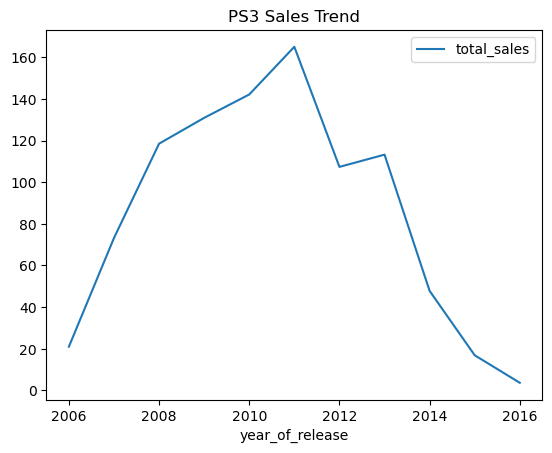

In [29]:
#PS3 sales trend

ps3_trend.plot(x='year_of_release', y='total_sales')
plt.title('PS3 Sales Trend')
plt.show()

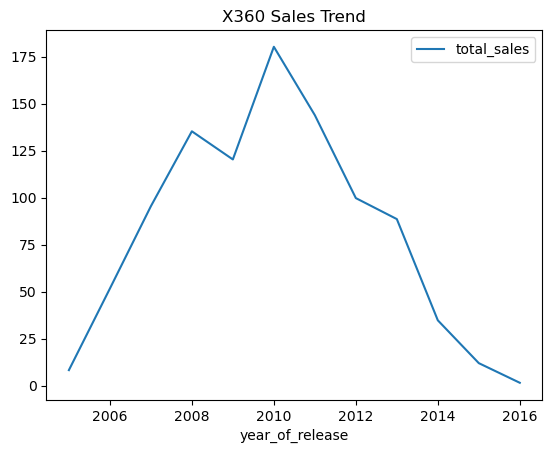

In [30]:
#x360 sales trend

x360_trend.plot(x='year_of_release', y='total_sales')
plt.title('X360 Sales Trend')
plt.show()

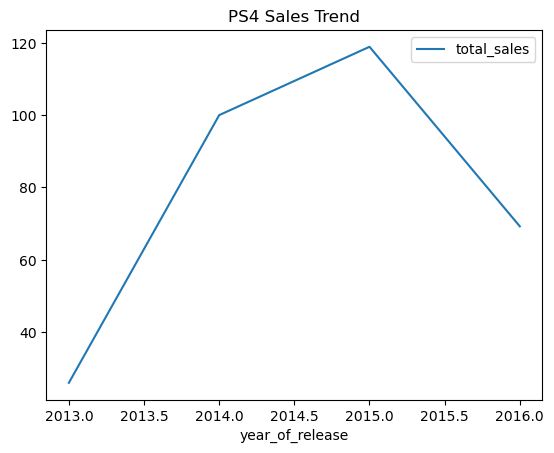

In [31]:
#PS4 sales trend

ps4_trend.plot(x='year_of_release', y='total_sales')
plt.title('PS4 Sales Trend')
plt.show()

Based on the graphs, PS4 had the most sales compared to the other two platforms in 2016. But all the graphs are shown the downward trend of all platfroms in 2016 but ps4 was still the most profitable platform among three.

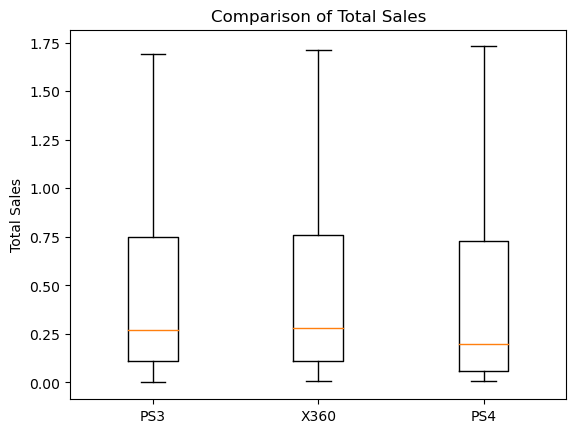

In [32]:
ps3 = games_pd.query('platform == "ps3"')
x360 = games_pd.query('platform == "x360"')
ps4 = games_pd.query('platform == "ps4"')
plt.boxplot([ps3['total_sales'], x360['total_sales'], ps4['total_sales']], 
            showfliers=False, 
            labels=['PS3', 'X360', 'PS4']) # Adding labels

plt.title('Comparison of Total Sales')  # Title for the boxplot
plt.ylabel('Total Sales') 
plt.show()

In this analysis, we compare the 2016 data for PS3, X360, and PS4. The total sales distributions for each game on these platforms show a resemblance. Notably, the PS4 stands out with a substantially higher number of outliers. In contrast, its interquartile range is notably tighter compared to the other consoles, and it also records the lowest median sales. Despite these variations in sales distributions, the data suggest that releasing games on any of these three platforms in 2017 could be a viable option.

In [33]:
recent_games =  games_pd[games_pd['year_of_release'] >= 2012]
display(recent_games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


<Figure size 1000x600 with 0 Axes>

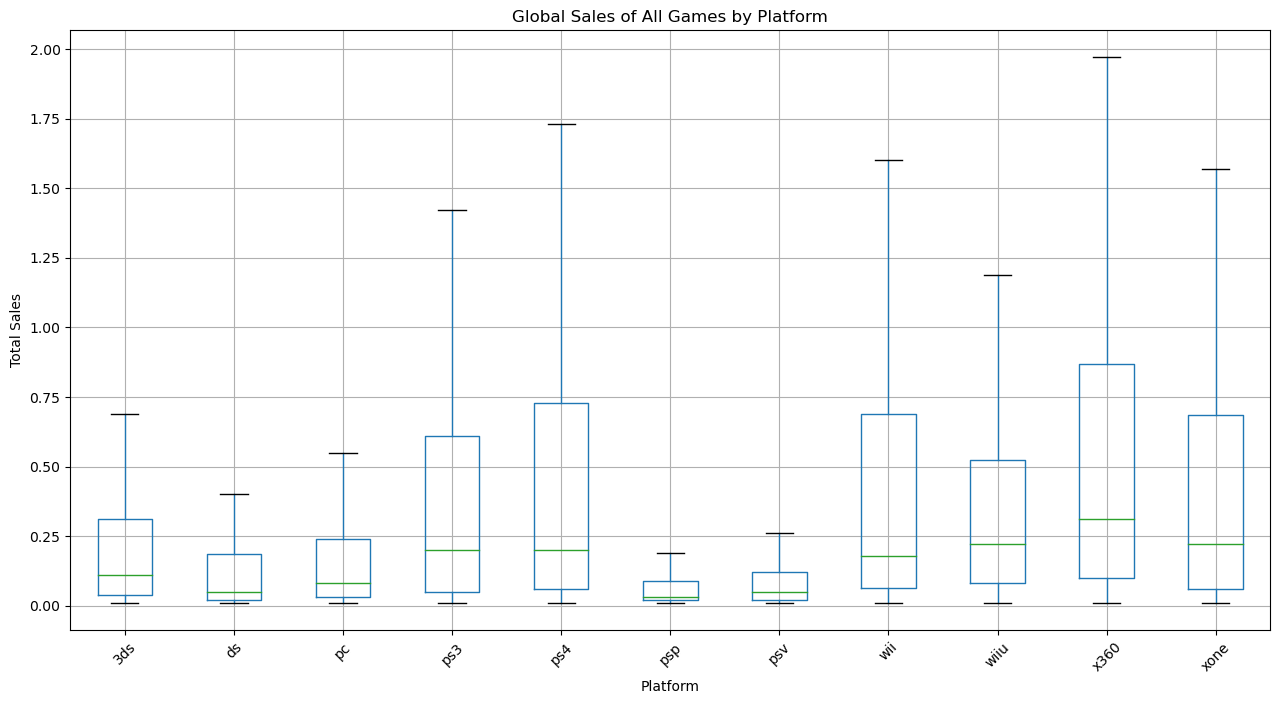

In [34]:
#Building box plot for global sales of all games
plt.figure(figsize=(10, 6))
recent_games.boxplot(column='total_sales', by='platform', figsize=(15, 8), showfliers=False)
plt.title('Global Sales of All Games by Platform')
plt.suptitle('')  # Suppress the default title to make it cleaner
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.show()

In [35]:
# Calculating and comparing average sales for each platform
average_sales = recent_games.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print(average_sales)

platform
x360    0.810068
ps4     0.801378
wii     0.655000
xone    0.645020
ps3     0.585781
wiiu    0.559116
3ds     0.484653
ds      0.404839
pc      0.250600
psv     0.120000
psp     0.064682
Name: total_sales, dtype: float64


The box plot and average sales data suggest a diverse gaming market. Newer platforms tend to have higher average sales, possibly driven by a few blockbuster titles, as indicated by the outliers. In contrast, older platforms demonstrate more consistent but lower average sales. This variability underscores the dynamic nature of the gaming industry, where platform popularity and game success can fluctuate. The analysis indicates that while newer platforms might offer lucrative opportunities for high sales, established platforms maintain a consistent performance, appealing to a dedicated user base. Overall, the gaming market presents varied opportunities, with each platform catering to different segments of the gaming community.

## user and professional reviews of PS4 sales

,user_score,total_sales
user_score,1.000000,-0.031957
total_sales,-0.031957,1.000000


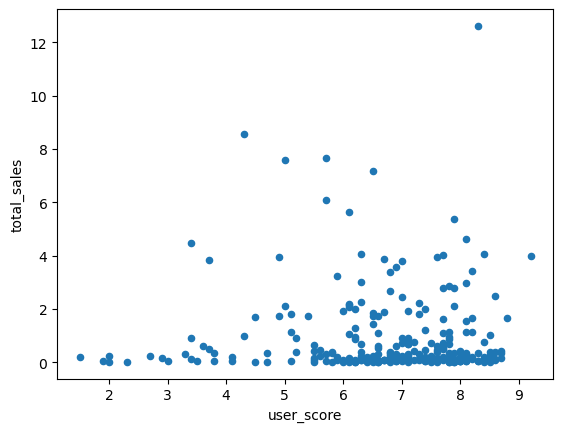

In [36]:
#building scatterplot for ps4 using user_score
ps4.plot(x='user_score', y='total_sales', kind='scatter')

#calculating correlation

ps4[['user_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


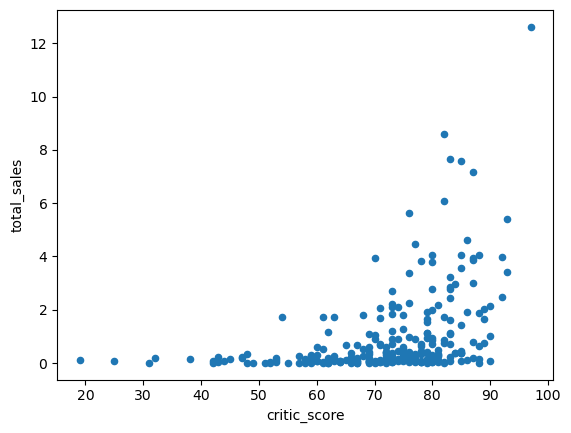

In [37]:
# building scatterplot for ps4 using critic_score
ps4.plot(x='critic_score', y='total_sales', kind='scatter')

#calculating correlation
ps4[['critic_score', 'total_sales']].corr()

### Conclusion
For PS4 games, professional critic reviews appear to have a more substantial impact on sales compared to user reviews. While there is some degree of relationship between critic scores and sales, indicating that better-reviewed games by critics tend to sell more, user scores do not show a similar pattern and seem to have little influence on sales. This analysis can be crucial for game publishers and developers, suggesting a focus on garnering positive critic reviews could be more beneficial for sales performance on the PS4 platform.

## the general distribution of games by genre

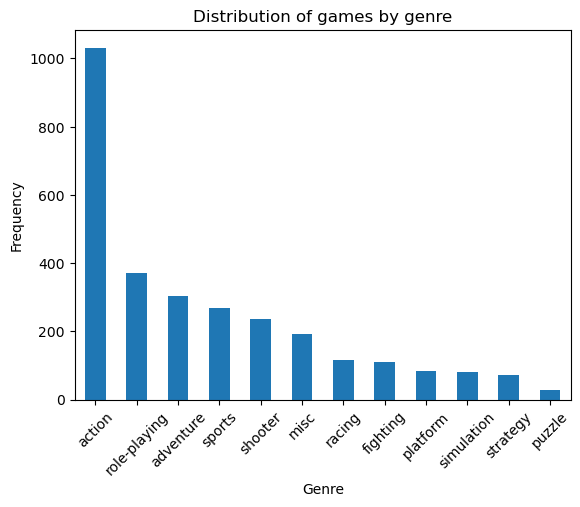

In [38]:
#Distribution of games by genre
recent_games.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of games by genre')
plt.xlabel('Genre')
plt.xticks(rotation = 45)
plt.ylabel('Frequency')
plt.show()

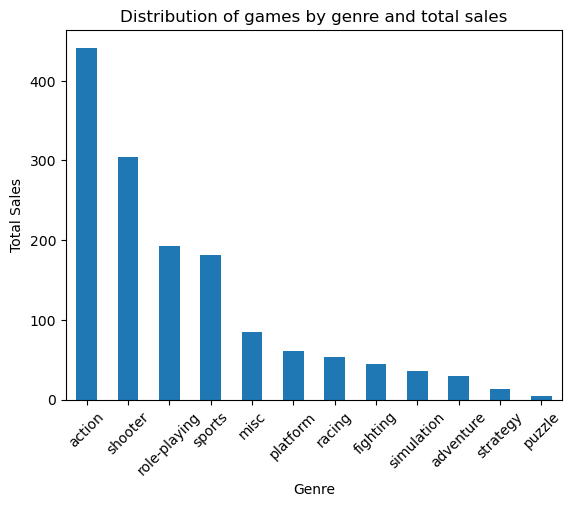

In [39]:
#Distribution of games by genre and total sales
recent_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of games by genre and total sales')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

When analyzing total sales by genre, it's evident that action games lead in sales compared to other genres. Despite having the fifth highest number of titles, action games achieve higher sales than role-playing games, which have a greater quantity of games released.

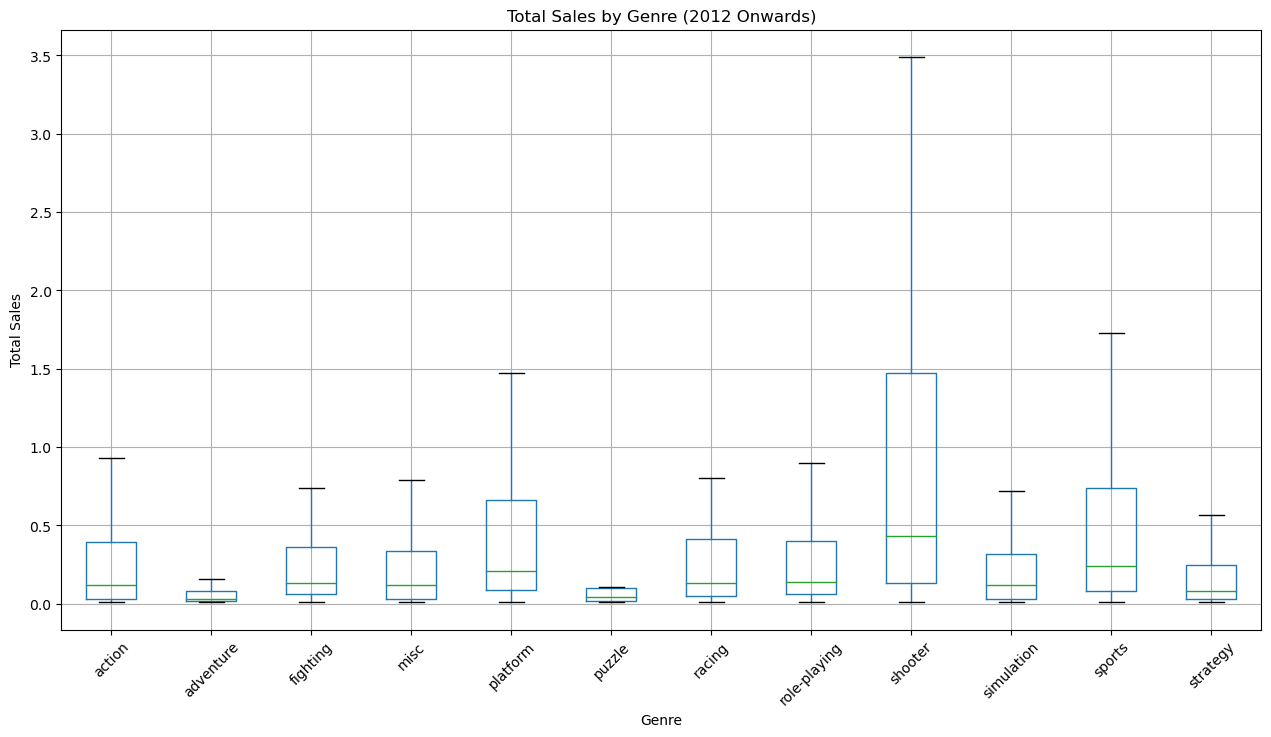

In [40]:
#adding box plot
recent_games.boxplot(column='total_sales', by='genre', figsize=(15, 8), showfliers=False)
plt.title('Total Sales by Genre (2012 Onwards)')
plt.suptitle('')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

## Step 4. Create a user profile for each region

For each region (NA, EU, JP), determine:

- The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

In [41]:
#Top five platform
def sales_platform(region):
    games = recent_games.groupby('platform')[region].sum().reset_index().sort_values(by=region, ascending=False)
    games['market_share'] = (games[region]/games[region].sum())*100
    return games.head()

In [42]:
na_region = sales_platform('na_sales')
display(na_region)

,platform,na_sales,market_share
9,x360,140.05,23.660292
4,ps4,108.74,18.370726
3,ps3,103.38,17.465198
10,xone,93.12,15.731856
0,3ds,56.15,9.486079


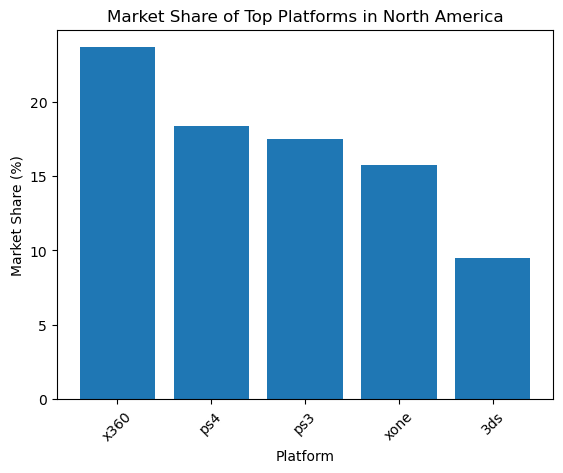

In [43]:
#adding bar graph for north america
plt.bar(na_region['platform'], na_region['market_share'])
plt.title('Market Share of Top Platforms in North America')
plt.xlabel('Platform')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [44]:
eu_region = sales_platform('eu_sales')
display(eu_region)

,platform,eu_sales,market_share
4,ps4,141.09,27.824012
3,ps3,106.86,21.073598
9,x360,74.52,14.695906
10,xone,51.59,10.173937
0,3ds,42.85,8.450343


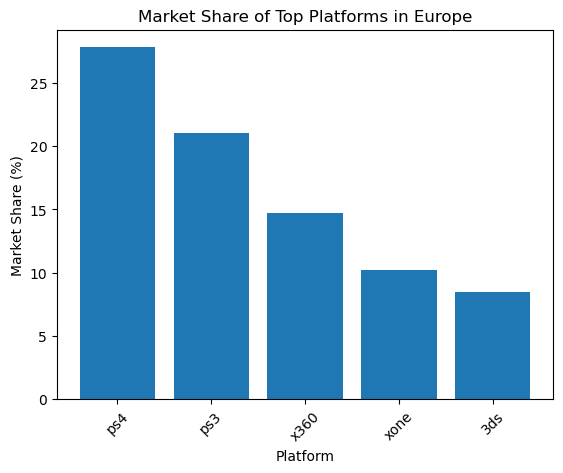

In [45]:
#Adding bar graph for europe
plt.bar(eu_region['platform'], eu_region['market_share'])
plt.title('Market Share of Top Platforms in Europe')
plt.xlabel('Platform')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [46]:
jp_region = sales_platform('jp_sales')
display(jp_region)

,platform,jp_sales,market_share
0,3ds,87.84,45.583809
3,ps3,35.29,18.313441
6,psv,21.11,10.954852
4,ps4,15.96,8.282304
8,wiiu,13.01,6.751427


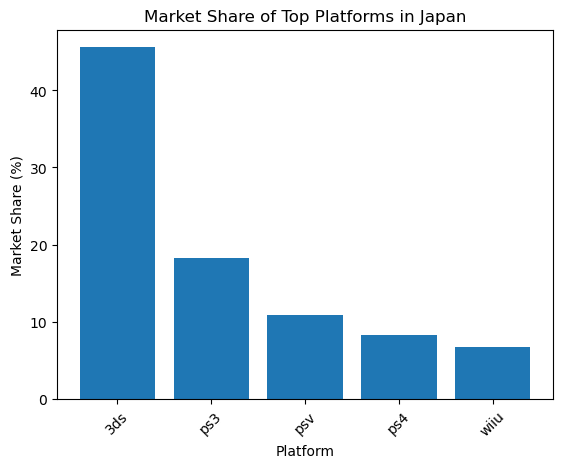

In [47]:
#Adding bar graph for Japan
plt.bar(jp_region['platform'], jp_region['market_share'])
plt.title('Market Share of Top Platforms in Japan')
plt.xlabel('Platform')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

From the given data, it's clear that in North America, the X360 and PS4 are the most popular, holding market shares of 23.66% and 18.37%, respectively. In Europe, the PS4 and PS3 take the lead. However, the trend differs in Japan, where the 3DS platform leads with a 45.58% market share.

In [48]:
#Top Five Genre
def sales_genre(region):
    games_genre = recent_games.groupby('genre')[region].sum().reset_index().sort_values(by=region, ascending=False)
    games_genre['market_share'] = (games_genre[region]/games_genre[region].sum())* 100
    return games_genre.head()

In [49]:
na_market = sales_genre('na_sales')
display(na_market)

,genre,na_sales,market_share
0,action,178.02,30.075010
8,shooter,144.81,24.464455
10,sports,81.53,13.773821
7,role-playing,64.11,10.830856
3,misc,38.19,6.451885


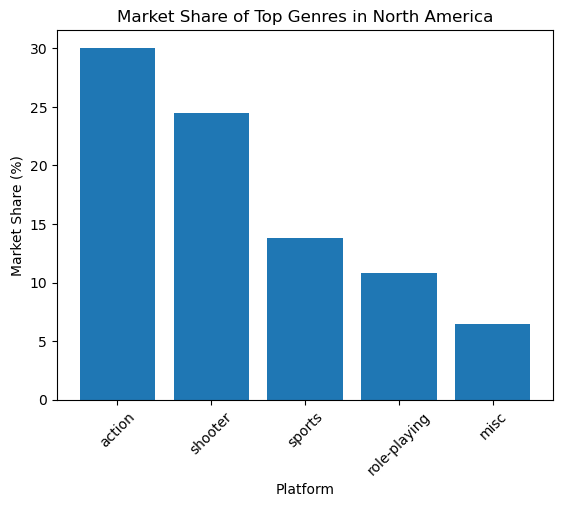

In [50]:
plt.bar(na_market['genre'], na_market['market_share'])
plt.title('Market Share of Top Genres in North America')
plt.xlabel('Platform')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [51]:
eu_market = sales_genre('eu_sales')
display(eu_market)

,genre,eu_sales,market_share
0,action,159.53,31.460519
8,shooter,113.49,22.381084
10,sports,69.09,13.625069
7,role-playing,48.58,9.580342
6,racing,27.29,5.381794


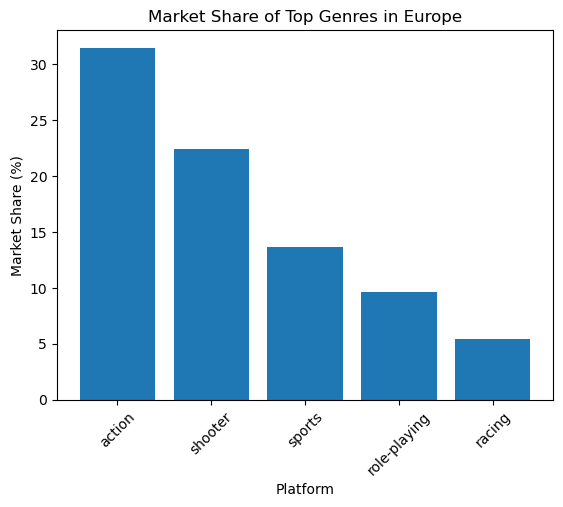

In [52]:
plt.bar(eu_market['genre'], eu_market['market_share'])
plt.title('Market Share of Top Genres in Europe')
plt.xlabel('Platform')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [53]:
jp_market = sales_genre('jp_sales')
display(jp_market)

,genre,jp_sales,market_share
7,role-playing,65.54,34.011417
0,action,52.80,27.400104
3,misc,12.86,6.673586
9,simulation,10.41,5.402180
2,fighting,9.44,4.898806


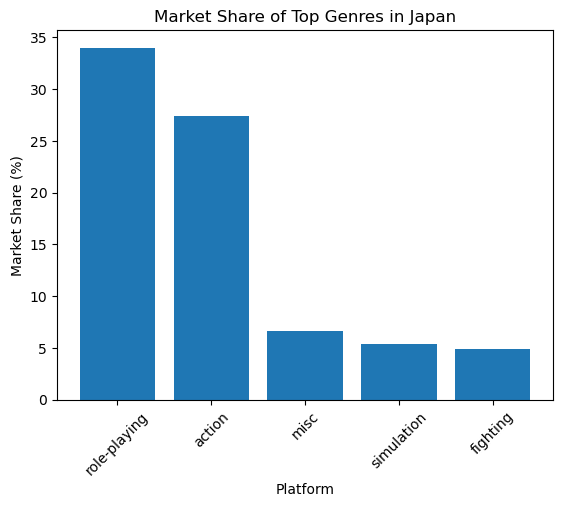

In [54]:
plt.bar(jp_market['genre'], jp_market['market_share'])
plt.title('Market Share of Top Genres in Japan')
plt.xlabel('Platform')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In terms of genre preferences, the North American and European markets show similar patterns, with action, sports, shooter, platform, racing, and miscellaneous genres leading in sales. On the other hand, the Japanese market demonstrates a distinct preference for role-playing games.

In [55]:
#ESRB rating
esrb_rating = recent_games.groupby('rating').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'total_sales':'sum'})
display(esrb_rating)

,na_sales,eu_sales,jp_sales,total_sales
rating,,,,
E,114.49,113.05,28.33,287.33
E10+,75.96,55.56,8.19,155.98
M,231.57,193.96,21.20,510.11
T,66.31,53.01,26.09,163.39
unknown,103.59,91.50,108.89,331.17


# Step 5. Test the following hypotheses:

- Average user ratings of the Xbox One and PC platforms are the same. 

- Average user ratings for the Action and Sports genres are different.

Set the alpha threshold value yourself.

Explain:

- How you formulated the null and alternative hypotheses 

- What significance level you chose to test the hypotheses, and why

### Hypothesis 1 (Platform Ratings):
    - Null Hypothesis: The average user ratings for Xbox One and PC platforms are the same.
    - Alternative Hypothesis: The average user ratings for Xbox One and PC platforms are different.

In [56]:
#average user ratings for platforms
alpha = 0.05

sample_1 = games_pd.query('platform == "xone" and year_of_release >= 2012')['user_score'].dropna()
sample_2 = games_pd.query('platform == "pc" and year_of_release >= 2012')['user_score'].dropna()
results = st.ttest_ind(sample_1, sample_2)
print('p-value:', results.pvalue)

if(results.pvalue<alpha):
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis')

p-value: 0.5535080500643661
We cannot reject the null hypothesis


### Hypothesis 2 (Genre Ratings):
    - Null Hypothesis: The average user ratings for the Action and Sports genres are the same.
    - Alternative Hypothesis: The average user ratings for the Action and Sports genres are different.

In [57]:
#average user ratings for genres
action = games_pd.query('genre == "action" and year_of_release >= 2012')['user_score'].dropna()
sports = games_pd.query('genre == "sports" and year_of_release >=2012')['user_score'].dropna()


alpha = 0.05

results_genre = st.ttest_ind(action, sports)
print('p-value:', results_genre.pvalue)

if(results_genre.pvalue<alpha):
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis')

p-value: 3.517102771333629e-26
We reject the null hypothesis


### Significance Level:
- A common choice for the significance level (α) is 0.05. This implies that you're willing to accept a 5% chance of incorrectly rejecting the null hypothesis.

# General Conclusion

Our analysis of the data reveals that a game's success is influenced by a multitude of variables. These include the game's genre, the console it's played on, and the geographical region where it's released. The ESRB rating can also significantly affect a game's popularity in various countries.

However, it's important to note that other elements might also play a role in determining how well a game does in the market. Additionally, our box plot distribution suggests that while releasing a game in one of the leading genres can increase the chances of higher earnings, there's substantial variation in profits within these popular genres, as evidenced by numerous outliers.